### Credit Risk

## Data ingestion / File reading

In [17]:
path =r"D:\ML\CreditRisk.xlsx"

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
df = pd.read_excel(path)

### Basic checks and quality checks

In [21]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    float64
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        981 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 99.8+ KB


In [23]:
### Check missing obsnervations
df.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
### Check duplicate observations
df.duplicated().sum()

np.int64(0)

In [25]:
### drop loan id
df.drop('Loan_ID',axis=1,inplace=True)

In [27]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## seperation of x and y

In [28]:
x = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']

In [29]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [30]:
y.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

### 

<Axes: ylabel='Loan_Status'>

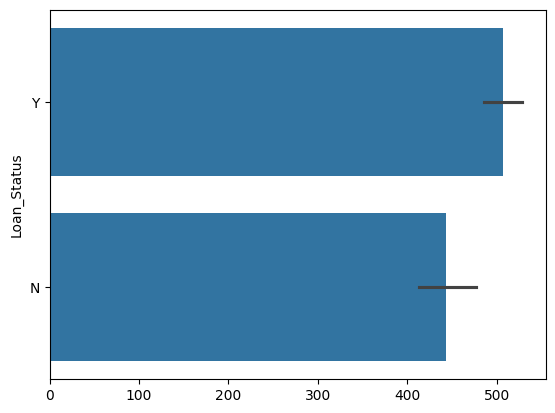

In [31]:
sns.barplot(y)

In [32]:
a = y.value_counts()

In [33]:
a

Loan_Status
Y    712
N    269
Name: count, dtype: int64

<Axes: xlabel='Loan_Status'>

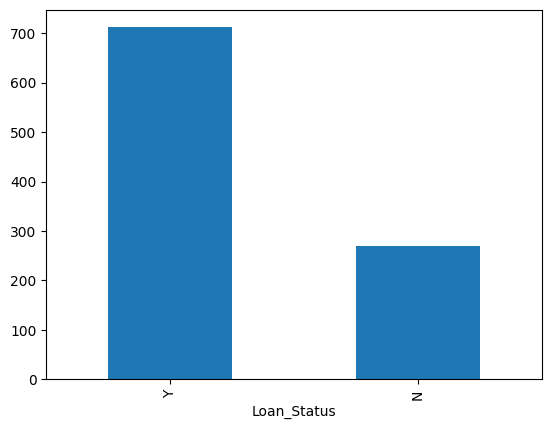

In [36]:
a.plot(kind='bar')

### Sepration of cat and numerical data

In [37]:
cat = x.columns[x.dtypes=='object']
num = x.columns[x.dtypes!='object']

In [39]:
print(cat)
print()
print(num)

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], dtype='object')

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
